Read data.

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('./HW2 附件/HW2_bike-sharing_train.csv')

Preprocessing the dataset.

In [26]:

df = data.copy()
def seperate_dt(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    # # Extract year, month, day, hour, minute, and second as separate columns
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df
df = seperate_dt(df).drop(columns=['datetime'])

# check nan
def check_nan(df):
    return df.isna().any().any()
check_nan(df)

# turn season into encoding
def onehot_encoding(df, column_name):
    df_encoded = pd.get_dummies(df, columns=[column_name], prefix=[column_name])
    print(df.shape, "->", df_encoded.shape)
    return df_encoded
df = onehot_encoding(df,'season')

def standardization(df):
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the data using StandardScaler
    df_standardized = scaler.fit_transform(df)
    df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
    return df_standardized

def normalization(df):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data using MinMaxScaler
    df_normalized = scaler.fit_transform(df)
    df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
    return df_normalized
print(df)


(8386, 13) -> (8386, 16)
      holiday  workingday  weather   temp   atemp  humidity  windspeed  count  \
0           0           0        1   9.84  14.395        81     0.0000     16   
1           0           0        1   9.02  13.635        80     0.0000     40   
2           0           0        1   9.02  13.635        80     0.0000     32   
3           0           0        1   9.84  14.395        75     0.0000     13   
4           0           0        1   9.84  14.395        75     0.0000      1   
...       ...         ...      ...    ...     ...       ...        ...    ...   
8381        0           1        1  16.40  20.455        50    26.0027    562   
8382        0           1        1  15.58  19.695        50    23.9994    569   
8383        0           1        1  15.58  19.695        50    26.0027    336   
8384        0           1        1  14.76  17.425        57    15.0013    241   
8385        0           1        1  13.94  17.425        61     6.0032    129   

  

Seperate into X and y.

In [18]:
X = df.drop(columns=['count'])
y = df[['count']]
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,1,0,0,0
3,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,1,0,0,0
4,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,0,1,1,16.40,20.455,50,26.0027,2012,12,19,17,0,0,0,1
8382,0,1,1,15.58,19.695,50,23.9994,2012,12,19,18,0,0,0,1
8383,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0,0,1
8384,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0,0,1


Split up dataset into Train, Val and Test.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set - Features:")
print(X_train.shape)
print("Training Set - Labels:")
print(y_train.shape)

print("\nValidation Set - Features:")
print(X_val.shape)
print("Validation Set - Labels:")
print(y_val.shape)

print("\nTest Set - Features:")
print(X_test.shape)
print("Test Set - Labels:")
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
Training Set - Features:
(6708, 15)
Training Set - Labels:
(6708, 1)

Validation Set - Features:
(839, 15)
Validation Set - Labels:
(839, 1)

Test Set - Features:
(839, 15)
Test Set - Labels:
(839, 1)


In [59]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# You can also evaluate the model's performance on the validation set
y_val_pred = model.predict(X_val)

# You can also evaluate the model's performance on the test set
y_test_pred = model.predict(X_test)

# You can use various evaluation metrics to assess the model's performance
# For example, you can use mean squared error (MSE) or R-squared (R2) to measure performance.

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE) on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate the R-squared (R2) on the training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate the mean squared error (MSE) on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)

# Calculate the R-squared (R2) on the validation set
r2_val = r2_score(y_val, y_val_pred)

# Calculate the mean squared error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared (R2) on the test set
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("MSE: ", mse_train)
print("R-squared: ", r2_train)

print("\nValidation Set Metrics:")
print("MSE: ", mse_val)
print("R-squared: ", r2_val)

# print("\nTest Set Metrics:")
# print("MSE: ", mse_test)
# print("R-squared: ", r2_test)


Training Set Metrics:
MSE:  20133.72976204132
R-squared:  0.392812096266818

Validation Set Metrics:
MSE:  16735.957662259785
R-squared:  0.4246284261014356


In [61]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.2)  # You can adjust the alpha parameter for regularization

# Fit the model to the training data
lasso_model.fit(X_train_scaled, y_train)

# Predict on the training data
y_train_pred = lasso_model.predict(X_train_scaled)

# Predict on the validation data
y_val_pred = lasso_model.predict(X_val_scaled)

# Predict on the test data
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Metrics (Lasso Regression):")
print("MSE: ", mse_train)
print("R-squared: ", r2_train)

print("\nValidation Set Metrics (Lasso Regression):")
print("MSE: ", mse_val)
print("R-squared: ", r2_val)

# print("\nTest Set Metrics (Lasso Regression):")
# print("MSE: ", mse_test)
# print("R-squared: ", r2_test)


Training Set Metrics (Lasso Regression):
MSE:  20136.831908663004
R-squared:  0.39271854251763416

Validation Set Metrics (Lasso Regression):
MSE:  16715.254552325398
R-squared:  0.42534018584580957


In [39]:
print(y_train)
print(y_train_pred)

      count
4367    195
4161    228
208      83
6693    469
747      23
...     ...
5734     35
5191     42
5390    118
860      91
7270    694

[6708 rows x 1 columns]
[[ 16.74689094]
 [177.68143541]
 [112.24550474]
 ...
 [350.74346193]
 [ 95.39002118]
 [353.86881651]]


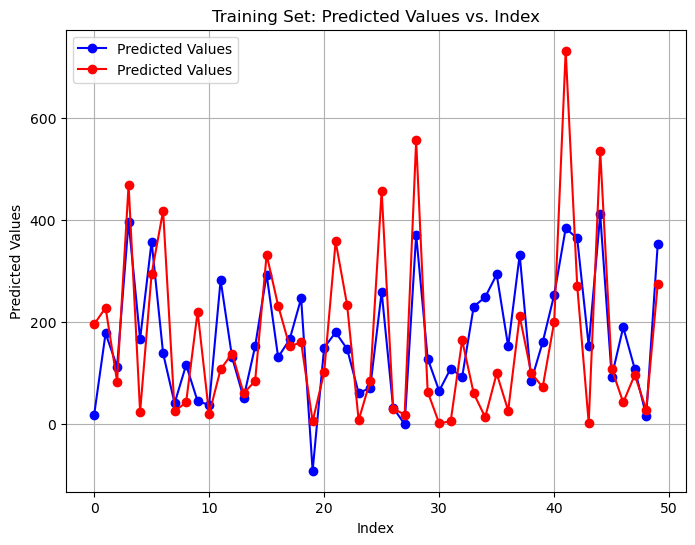

In [56]:
import matplotlib.pyplot as plt

# Create a sequence of indices for the data points
indices = range(len(y_train_pred))
num = 50
# Create a line plot for the training set
plt.figure(figsize=(8, 6))
plt.plot(indices[:num], y_train_pred[:num], marker='o', color='blue', label='Predicted Values')
plt.plot(indices[:num], y_train[:num], marker='o', color='red', label='Predicted Values')
plt.title("Training Set: Predicted Values vs. Index")
plt.xlabel("Index")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# You can create similar plots for the validation and test sets
